# K means Algorithm 
<p>using the K_mean for the movie review , the purpose of the this project is to find the relation between the different types of movies <p>

## Dataset overview

In [3]:
# importing the data and necessary packages 
import pandas as pd 
import numpy as np
import helper
from scipy.sparse import csr_matrix 
import matplotlib.pyplot as plt 

In [4]:
links  = pd.read_csv("ml-latest-small/links.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings  = pd.read_csv("ml-latest-small/ratings.csv")
tags   = pd.read_csv("ml-latest-small/tags.csv")

In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
movies.head()



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [32]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [33]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [34]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


## Romance vs Scifi

In [35]:
# functions for getting the genere of the movie 

def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings
        

In [36]:
# calculating the average arting of romance and scify movies 

genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])

print( "Number of records: ", len(genre_ratings))
genre_ratings.head()

Number of records:  671


,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


<b>we are striping out some of the people who like both scifi and romance 


In [37]:
# imported helper function that will get the bias dataset 
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset = genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [38]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


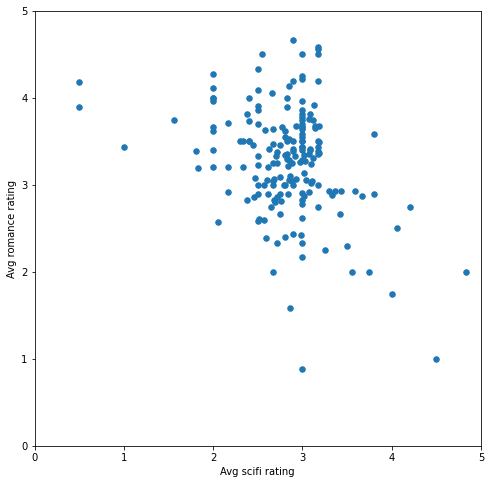

In [39]:
# Now Plotting the data 
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)


draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [40]:
# converting it into the list 
X = biased_dataset[['avg_scifi_rating', 'avg_romance_rating']]

# choosing K 

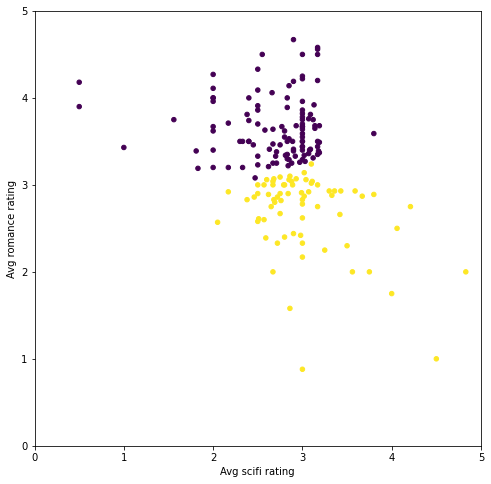

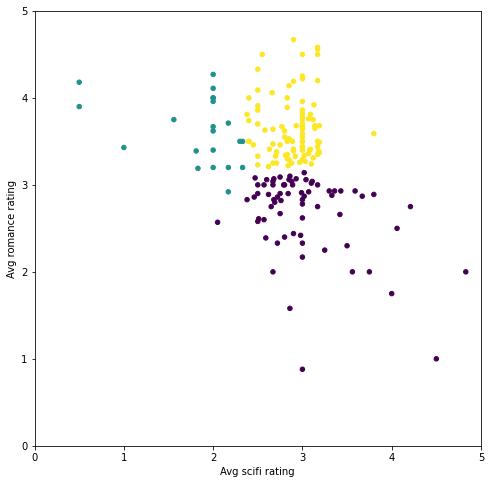

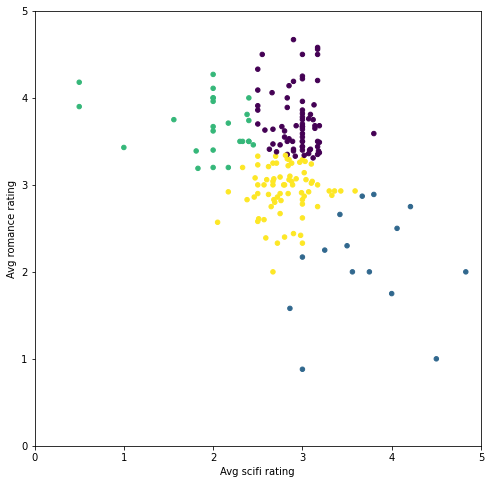

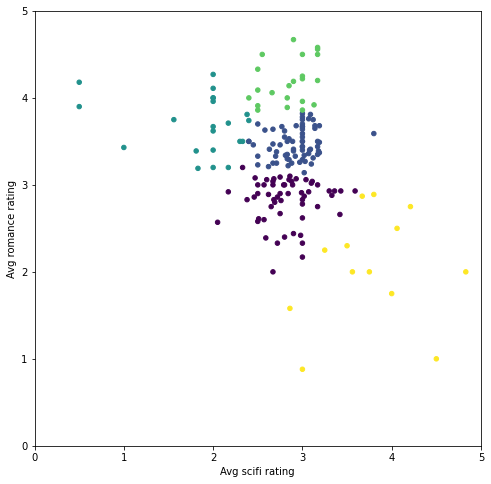

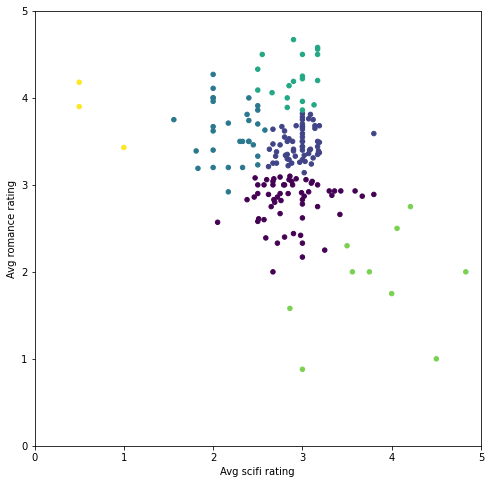

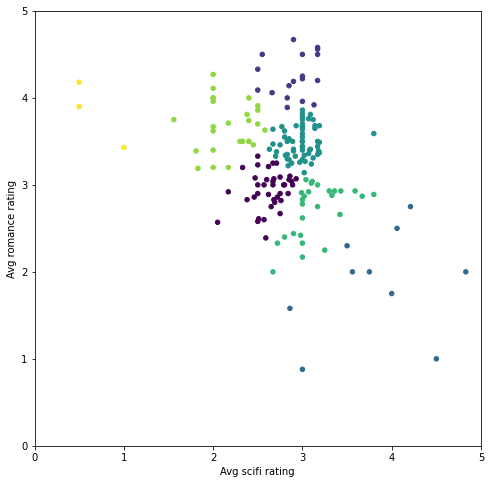

In [41]:
from sklearn.cluster import KMeans 

number_of_clusters = 7 
for i in range(2,number_of_clusters+1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    predictions = kmeans.predict(X)
    # ploting the data 
    helper.draw_clusters(biased_dataset, predictions)
    

<p> But the Question still remain how many of clustor is good enough. For sake of simplicity we will be looking to <b>"the elbow method" </p>
The elbow method works by plotting the ascending values of k versus the total error calculated using that K 

In [42]:
def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

possible_k_values = range(2, len(X)+1 , 5)

errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

In [43]:
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (7, 0.3855467296981382),
 (12, 0.34555447028308317),
 (17, 0.3713825059645321),
 (22, 0.35638747818963895),
 (27, 0.3700263118004005),
 (32, 0.3910477741059803),
 (37, 0.3869900045008103),
 (42, 0.37301080810191317),
 (47, 0.3712677200584509),
 (52, 0.36831734213242123),
 (57, 0.3704985286115629),
 (62, 0.3495901208944717),
 (67, 0.3494533964452374),
 (72, 0.3675868188188845),
 (77, 0.34356212776166817),
 (82, 0.3523946505594128),
 (87, 0.3241265751901526),
 (92, 0.33081505988636295),
 (97, 0.31501097831790614),
 (102, 0.31104394238353195),
 (107, 0.2905498191032798),
 (112, 0.28954815997285377),
 (117, 0.2741703433080055),
 (122, 0.2691412330897309),
 (127, 0.2506731098490937),
 (132, 0.23900361634221462),
 (137, 0.2296997041066008),
 (142, 0.22306680825642305),
 (147, 0.20594124713980563),
 (152, 0.1913221804331515),
 (157, 0.1625140776040854),
 (162, 0.15564994602870244),
 (167, 0.12920960729960065),
 (172, 0.09686500587092362),
 (177, 0.0642301201631745),

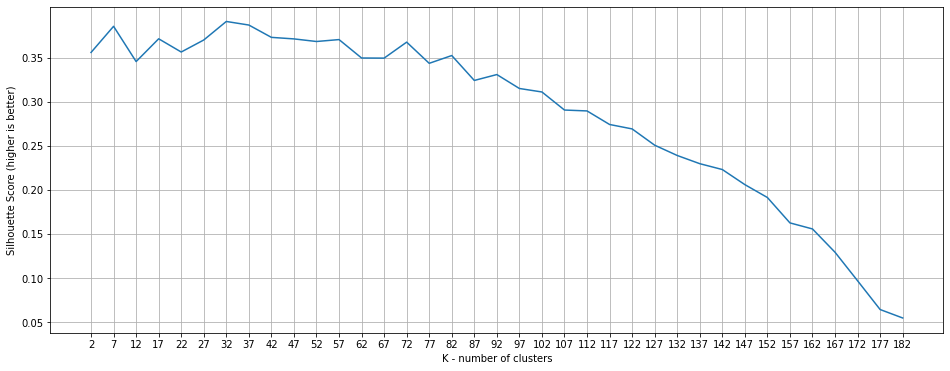

In [44]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

<p>The perfect score for this  exercise would be 7,17, 22, 27 and others but we are going with the 7 because it is easy to visualize   </p>

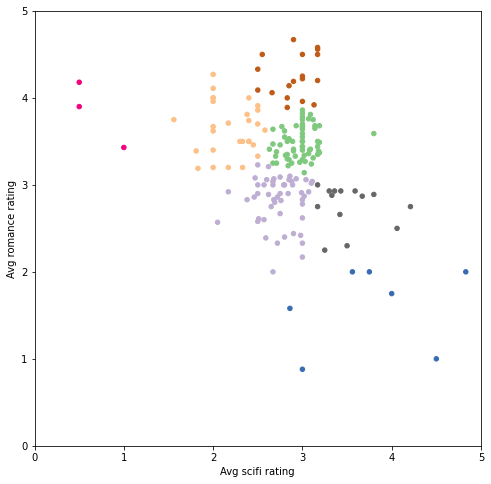

In [45]:
kmeans_4 = KMeans(n_clusters = 7)
kmeans_4.fit(X)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')

# Adding all the genre into the actions 

In [46]:
all_genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi', 'Action'], ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])

all_genre_rating = helper.bias_genre_rating_dataset(all_genre_ratings, 3.2, 2.5).dropna()

print("Number of records ", len(all_genre_rating))

Number of records  183


In [47]:
X_with_action =  all_genre_rating[['avg_scifi_rating', 'avg_romance_rating', 'avg_action_rating']].values

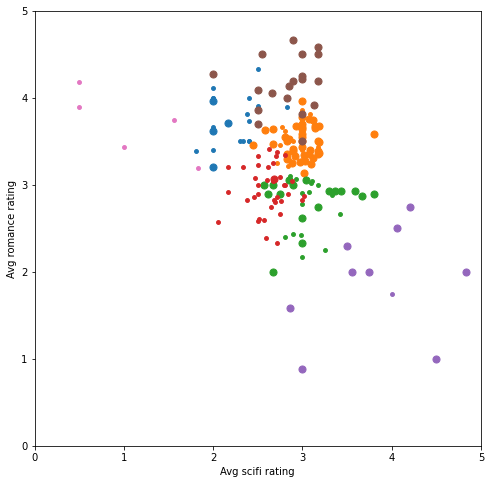

In [48]:
kmeans_5 =  KMeans(n_clusters = 7)
kmeans_5.fit(X_with_action)

# and just plot it
predictions_5 = kmeans_5.predict(X_with_action)
helper.draw_clusters_3d(all_genre_rating,predictions_5 )

<p>
We can start seeing the added genre is changing how the users are clustered. The more data we give to k-means, the more similar the tastes of the people in each group would be. Unfortunately, though, we lose the ability to visualize what's going on past two or three dimensions if we continue to plot it this way. In the next section, we'll start using a different kind of plot to be able to see clusters with up to fifty dimensions.
</p>

# Movie-Level Clustering 

In [49]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:100, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dominance of NaN values presents the first issue. Most users have not rated and watched most movies. Datasets like this are called "sparse" because only a small number of cells have values. <br>

To get around this, let's sort by the most rated movies, and the users who have rated the most number of movies. That will present a more 'dense' region when we peak at the top of the dataset.<br>

If we're to choose the most-rated movies vs users with the most ratings, it would look like this:

In [50]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


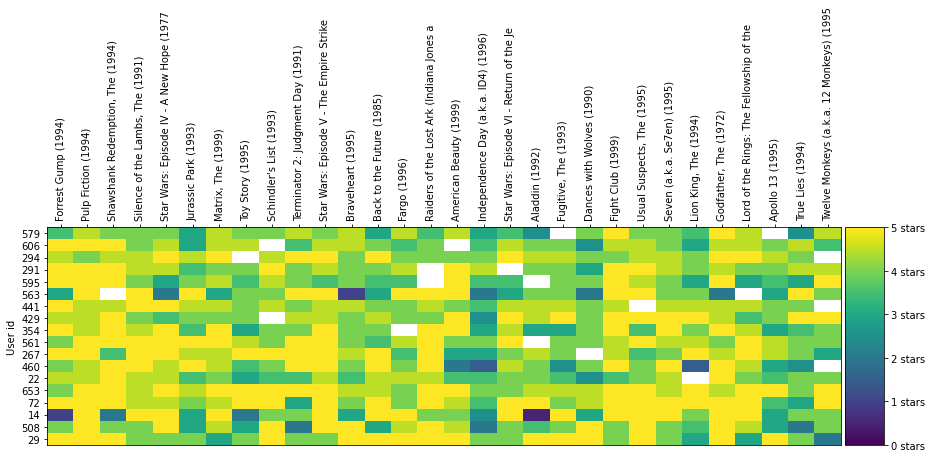

In [51]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [52]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)
most_rated_movies_1k.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())
import scipy.sparse
#mat = csr_matrix()

sparse_rating = csr_matrix(pd.DataFrame.sparse.from_spmatrix(most_rated_movies_1k).to_coo())

AttributeError: 'DataFrame' object has no attribute 'tocsc'

# Clustering 

In [ ]:
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_rating)
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

# Predictions 

# Recommendation

In [31]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.3.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : AMD64 Family 23 Model 24 Stepping 1, AuthenticAMD
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.1.3
numpy            : 1.19.2
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 46.4.0.post20200518
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.18.1
pandas_datareader: None
bs4              : None
bottleneck       : No